#### Input

In [1]:
%load_ext autoreload
%autoreload 2
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from helpers import plot_class
from helpers import helpfunction as helper
import numu_selection_helper as numu_helper

In [2]:
# Matplotlib help
import matplotlib
matplotlib.rcParams.update({'font.size': 13})
plt.rcParams.update({"axes.titlesize": "medium"})
plt_h = 4.65


def get_fig(ncols, nleg):
    fig, ax = plt.subplots(
        ncols=ncols,
        nrows=2,
        figsize=(3.5 * ncols + 2 * nleg, plt_h),
        gridspec_kw={"height_ratios": [3, 1]},
        constrained_layout=True,
        squeeze=False
    )
    return fig, ax

#### Constants

In [3]:
write_pickle = True
input_dir = "/home/nic/Desktop/MicroBooNE/bnb_nue_analysis/wvdp/"
output_dir = "/home/nic/Dropbox/MicroBooNE/_fig/numuCC_exclusive/"
plot_samples = {"dirt", "on", "off", "nu"}

In [4]:
if write_pickle:
    # Load Samples, takes a minute or two
    numu_helper.CreateAfterTraining(plot_samples, input_dir, one_file=True)

['after_reducing.pckl', 'dirt_slimmed.pckl', 'beam_off_slimmed.pckl', 'after_training.pckl', 'nu_new_slimmed.pckl', 'beam_on_slimmed.pckl']
Finished off (beam_off_slimmed.pckl), took 9.0 seconds.
Finished dirt (dirt_slimmed.pckl), took 1.9 seconds.
Finished on (beam_on_slimmed.pckl), took 0.9 seconds.


/home/nic/.local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: PerformanceWarning: indexing past lexsort depth may impact performance.
  interactivity=interactivity, compiler=compiler, result=result)
/home/nic/.local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: PerformanceWarning: indexing past lexsort depth may impact performance.
  interactivity=interactivity, compiler=compiler, result=result)


Finished nu (nu_new_slimmed.pckl), took 179.6 seconds.


In [5]:
sideband = False
run12 = False
run3 = False
fake = False

pot_dict = {}
master_query = "optical_filter"
title_str = ''

if not run12 + run3 + sideband + fake:
    full_sample = True
    print('Unblinded sample')
    beam_on = "on"
    pot_dict['EXT'] = helper.pot_dict['ext']
    
elif (run12 + run3 + sideband)==1:
    full_sample = False
    title_str = r"Reconstructed $\nu_e$ Energy > 0.9 GeV"
    plt_h = 4.85 # slightly higher plots when title is 2 lines
    beam_on = 'sideband'
    master_query = (
        "reco_e>0.9"
    )
    if run12:
        pot_dict = helper.pot_dict['sideband12']
        pot_dict['EXT'] = helper.pot_dict['ext12']
        master_query+= ' & (Run<3 | (sample!=2 & sample!=9))'
        
    elif run3:
        pot_dict = helper.pot_dict['sideband3']
        pot_dict['EXT'] = helper.pot_dict['ext3']
        master_query+= ' & (Run==3 | (sample!=2 & sample!=9))'
    elif sideband:
        pot_dict = helper.pot_dict['sideband']
        pot_dict['EXT'] = helper.pot_dict['ext']
    else:
        print('Not possible!')
elif fake:
    full_sample = True
    title_str = r"Fake data-set 1"
    plt_h = 4.85 # slightly higher plots when title is 2 lines
    beam_on = 'fake'
    pot_dict = helper.pot_dict['fake']
else:
    print('Not possible!')
print(beam_on,pot_dict)

Unblinded sample
on {'EXT': 273984645}


In [6]:
input_file = input_dir + "after_reducing.pckl"

In [7]:
%%time
plotter = plot_class.Plotter(
    input_file,
    signal="numu",
    genie_version="mcc9.1",
    beam_on=beam_on,
    pot_dict=pot_dict,
    master_query=master_query,
    load_syst=["weightsFlux", "weightsGenie"],
    show_lee=False,
    pi0_scaling=False
)

Using the spline weights as in MCC9.1 Genie V3 tune 1
All plots are scaled to 4.84e+19 POT, Beam_on data corresponds to 4.84e+19 POT
Loaded all daughter dataframes.
Started loading systematic weights.

Loaded all universes for weightsFlux.
Loaded all universes for weightsGenie.
Initialisation completed!
CPU times: user 13.3 s, sys: 42.4 s, total: 55.7 s
Wall time: 1min 2s


In [8]:
print(plotter.keys)

{'weightSplineTimesTune', 'backtracked_start_x', 'numu_ev_considered', 'backtracked_overlay_purity', 'trk_theta_v', 'npi0', 'trk_score_v', 'all_end_contained', 'secondshower_Y_nhit', 'nmuon', 'reco_nu_vtx_y', 'n_tracks', 'hits_ratio', 'npion', 'CosmicIPAll3D', 'contained_fraction', 'backtracked_purity', 'backtracked_py', 'leeweight', 'slpdg', 'pfp_shr_daughters_v', 'trk_llr_pid_score_v', 'backtracked_start_y', 'nproton', 'interaction', 'muon_candidate', 'CosmicDirAll3D', 'backtracked_px', 'event_scale', 'n_showers_contained', 'non_muon_cand_minll', 'n_showers', 'muon_candidate_no_pid', 'pfp_trk_daughters_v', 'evt', 'optical_filter', 'n_mu_cand', 'run', 'pfp_generation_v', 'merge_bestdist', 'reco_e', 'true_fid_vol', 'backtracked_e', 'nueccinc', 'nu_pdg', 'trk_phi_v', 'all_start_contained', 'topological_score', 'ismerged', 'reco_nu_vtx_sce_y', 'true_vtx_distance', 'backtracked_start_z', 'nu_e', 'trk_len_v', 'reco_nu_vtx_x', 'non_muon_cand_maxll', 'nelec', 'pfnhits', 'sub', 'weightSplineT

In [9]:
print(plotter.title_str)

MicroBooNE 4.8e19$\,$POT, Internal


In [10]:
plotter.title_str = r'MicroBooNE 4.84 $\times 10^{{19}}\,$POT'

### Plots

#### Data/MC comparison

MC category: $p$: 631. 	#entries 113229
MC category: $\mu$: 1941. 	#entries 218835
MC category: $e$: 1.9 	#entries 3265
MC category: $\pi^{\pm}$: 222. 	#entries 78968
MC category: Cosmic: 556. 	#entries 53690
Calculating ratio and purity


/home/nic/Dropbox/MicroBooNE/bnb_nue_analysis/nuecc_python/helpers/plot_class.py:470: RuntimeWarning: divide by zero encountered in true_divide
  3 / (1 / beam_on_bins + 2 / prediction),


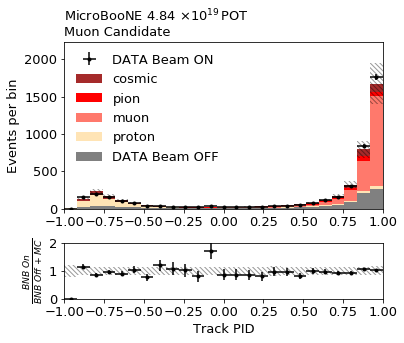

In [11]:
# first track
fig, ax = get_fig(1,1)

ratio, purity, ks_p, cnp, text_loc = plotter.plot_panel_data_mc(
    ax.T[0],
    "trk_llr_pid_score_v",
    "Track PID",
    N_bins=25,
    x_min=-1,
    x_max=1,
    query="numu_ev_considered & muon_candidate_no_pid",
    legend=True,
    title_str="Muon Candidate",
    kind="pdg",
    y_max_scaler= 1.15,
    legend_in=True,
)
plot_class.add_text(ax[0][0], [ratio,None,None,None], text_loc)

handles, labels = ax[0][0].get_legend_handles_labels()
labels_dict = dict(
    zip(('BNB On', 'Cosmic', '$\\pi^{\\pm}$', '$\\mu$', '$p$', 'BNB Off'),
        ('DATA Beam ON', 'cosmic', 'pion', 'muon', 'proton', 'DATA Beam OFF'))
    )
new_handles = []
new_labels = []
for i, (h, l) in enumerate(zip(handles, labels)):
    if '$e$' in l:
        continue
    else:
        new_handles.append(h)
        new_labels.append(labels_dict[l.split(":", 1)[0]])
new_handles = [new_handles[0]] + new_handles[1:][::-1]
new_labels = [new_labels[0]] + new_labels[1:][::-1]
ax[0][0].legend(new_handles, new_labels, loc="upper left", frameon=False)

# fig.savefig(output_dir + "muon_candidate_pid_pdg.pdf", bbox_inches="tight")


# fig, ax = get_fig(1,1)

# ratio, purity, ks_p, cnp, text_loc = plotter.plot_panel_data_mc(
#     ax.T[0],
#     "trk_llr_pid_score_v",
#     "Track PID",
#     N_bins=25,
#     x_min=-1,
#     x_max=1,
#     query="numu_ev_considered & muon_candidate_no_pid",
#     legend=True,
#     title_str="",
#     kind="cat",
#     y_max_scaler= 1.15
# )
# plot_class.add_text(ax[0][0], [ratio,None,None,None], text_loc)

# fig.savefig(output_dir + "muon_candidate_pid_cat.pdf", bbox_inches="tight")

In [15]:
plotter.on_daughters.columns

Index(['n_pfps', 'n_tracks', 'merge_bestdot', 'hits_ratio', 'NeutrinoEnergy2',
       'run', 'n_showers_contained', 'pfp_trk_daughters_v', 'trk_len_v',
       'trk_score_v', 'reco_nu_vtx_sce_x', 'n_tracks_contained',
       'CosmicDirAll3D', 'trk_phi_v', 'pfnhits', 'n_showers',
       'pfp_generation_v', 'reco_nu_vtx_y', 'SliceCaloEnergy2',
       'reco_nu_vtx_sce_z', 'secondshower_Y_nhit', 'evt', 'trk_theta_v',
       'trk_llr_pid_score_v', 'merge_bestdist', 'reco_nu_vtx_z',
       'reco_nu_vtx_x', 'CosmicIPAll3D', 'topological_score',
       'contained_fraction', 'sub', 'reco_nu_vtx_sce_y', 'pfp_shr_daughters_v',
       'ismerged', 'slpdg', 'reco_e', 'optical_filter', 'reco_fid_vol',
       'all_start_contained', 'all_end_contained', 'is_trk_at_vtx',
       'trk_at_vtx', 'numu_ev_considered', 'muon_candidate_no_pid',
       'n_mu_cand', 'muon_candidate', 'numu_ev_selected',
       'non_muon_cand_maxll', 'non_muon_cand_minll', 'plot_weight'],
      dtype='object')

In [41]:
aux_max_theta_track = plotter.on_daughters['trk_theta_v'].groupby(["sample", "Run", "event"]).transform('max')# == plotter.on_daughters['trk_theta_v'])
plotter.on_daughters.loc[:, 'aux_max_theta_track'] = aux_max_theta_track

In [42]:
plotter.on_daughters['aux_max_theta_track']

sample  Run  event  daughter
1       1    3      0           2.576200
                    1           2.576200
                    2           2.576200
             11     0           1.367946
             15     0           1.460650
                                  ...   
        3    27983  0           2.527322
                    1           2.527322
             27993  0           0.903103
             27996  0           0.645717
             28002  0           1.224886
Name: aux_max_theta_track, Length: 88910, dtype: float32

In [44]:
np.pi/3

1.0471975511965976

In [ ]:
plotter.on_daughters['trk_theta_v'].groupby(["sample", "Run", "event"]).transform('max')

In [54]:
plotter.on_daughters.query("numu_ev_selected &\
                           (trk_llr_pid_score_v<-0.5) &\
                           (trk_at_vtx==2) &\
                           non_muon_cand_maxll &\
                           (trk_len_v > 10) &\
                           (trk_len_v < 40) &\
                           (aux_max_theta_track < 1)")[["evt", 
                                                      "run", 
                                                      "sub", 
                                                      "reco_nu_vtx_z",
                                                      'reco_nu_vtx_sce_x',
                                                      "trk_theta_v",
                                                      "trk_phi_v",
                                                      "trk_len_v",
                                                      "trk_llr_pid_score_v", 
                                                      ]].to_csv('good_ccqe_events_tight_proton')

In [ ]:
# second track
fig, ax = get_fig(1,1.5)

ratio, purity, ks_p, cnp, text_loc = plotter.plot_panel_data_mc(
    ax.T[0],
    "trk_llr_pid_score_v",
    "Track PID",
    N_bins=25,
    x_min=-1,
    x_max=1,
    query="numu_ev_selected & non_muon_cand_maxll & trk_at_vtx==2",
    legend=True,
    title_str=r"Second track PID - $\nu_{\mu}CC$ + 1 track selection",
    kind="pdg",
    y_max_scaler= 1.15
)
plot_class.add_text(ax[0][0], [ratio,None,None,None], text_loc)

fig.savefig(output_dir + "two_tracks_pid_pdg.pdf", bbox_inches="tight")

# second track
fig, ax = get_fig(1,1.5)

ratio, purity, ks_p, cnp, text_loc = plotter.plot_panel_data_mc(
    ax.T[0],
    "trk_llr_pid_score_v",
    "Track PID",
    N_bins=25,
    x_min=-1,
    x_max=1,
    query="numu_ev_selected & non_muon_cand_maxll & trk_at_vtx==2",
    legend=True,
    title_str="",
    kind="cat",
    y_max_scaler= 1.15
)
plot_class.add_text(ax[0][0], [ratio,None,None,None], text_loc)

fig.savefig(output_dir + "two_tracks_pid_cat.pdf", bbox_inches="tight")

In [ ]:
# third track
fig, ax = get_fig(1,1.5)

ratio, purity, ks_p, cnp, text_loc = plotter.plot_panel_data_mc(
    ax.T[0],
    "trk_llr_pid_score_v",
    "Track PID",
    N_bins=25,
    x_min=-1,
    x_max=1,
    query="numu_ev_selected & non_muon_cand_maxll & trk_at_vtx==3",
    legend=True,
#     title_str=r"Max PID track - $\nu_{\mu}CC$ + 2 track selection",
    kind="pdg",
    y_max_scaler= 1.15
)
plot_class.add_text(ax[0][0], [ratio,None,None,None], text_loc)

# fig.savefig(output_dir + "three_tracks_pid_pdg.pdf", bbox_inches="tight")

# third track
fig, ax = get_fig(1,1.5)

ratio, purity, ks_p, cnp, text_loc = plotter.plot_panel_data_mc(
    ax.T[0],
    "trk_llr_pid_score_v",
    "Track PID",
    N_bins=25,
    x_min=-1,
    x_max=1,
    query="numu_ev_selected & non_muon_cand_maxll & trk_at_vtx==3",
    legend=True,
#     title_str=r"Max PID track - $\nu_{\mu}CC$ + 2 track selection",
    kind="cat",
    y_max_scaler= 1.15
)
plot_class.add_text(ax[0][0], [ratio,None,None,None], text_loc)

# fig.savefig(output_dir + "three_tracks_pid_cat.pdf", bbox_inches="tight")

In [ ]:
# second and third track together, for paper
fig, ax = plt.subplots(
    ncols=2,
    nrows=2,
    figsize=(7 * plotter.gr, 4.5),
    gridspec_kw={"height_ratios": [3, 1]},
)

ratio, purity, ks_p, cnp, text_loc = plotter.plot_panel_data_mc(
    ax.T[0],
    "trk_llr_pid_score_v",
    "Track PID",
    N_bins=25,
    x_min=-1,
    x_max=1,
    query="numu_ev_selected & non_muon_cand_maxll & trk_at_vtx==2",
    title_str="Second Track",
    legend=False,
    kind="cat",
    y_max_scaler= 1.15
)

ratio, purity, ks_p, cnp, text_loc = plotter.plot_panel_data_mc(
    ax.T[1],
    "trk_llr_pid_score_v",
    "Track PID",
    N_bins=25,
    x_min=-1,
    x_max=1,
    query="numu_ev_selected & non_muon_cand_maxll & trk_at_vtx==3",
    title_str="Third Track",
    legend=True,
    kind="cat",
    y_max_scaler= 1.15
)

handles, labels = ax[0][1].get_legend_handles_labels()
# labels_dict = dict(
#     zip(('BNB On', 'Cosmic', '$\\pi^{\\pm}$', '$\\mu$', '$p$', 'BNB Off'),
#         ('DATA ON', 'cosmic', 'pion', 'muon', 'proton', 'DATA OFF'))
#     )
new_handles = []
new_labels = []
for i, (h, l) in enumerate(zip(handles, labels)):
    aux_l = l.split(":", 1)[0]
    if aux_l == 'BNB On':
        aux_l = 'DATA Beam ON'
    elif aux_l == 'BNB Off':
        aux_l = 'DATA Beam OFF'
    elif aux_l == 'Cosmic':
        aux_l = 'cosmic or\nout of cryostat'
    elif aux_l == 'Out of Cryo':
        continue
    new_labels.append(aux_l)
    new_handles.append(h)
new_handles = [new_handles[0]] + new_handles[1:][::-1]
new_labels = [new_labels[0]] + new_labels[1:][::-1]
ax[0][1].legend(new_handles, new_labels, bbox_to_anchor=(1.02, 0.5), loc="center left", frameon=False)

fig.tight_layout()
fig.savefig(output_dir + "two_three_tracks_pid_pdg.pdf", bbox_inches="tight")